In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
     "PlantVillage",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
    


)


# datagen = ImageDataGenerator(
#     rescale = 1./255,
#     validation_split = 0.2


# )



# train_generator = datagen.flow_from_directory(
#     "PlantVillage",
#     target_size = (IMAGE_SIZE, IMAGE_SIZE),
#     batch_size = BATCH_SIZE,
# #     class_mode = 'categorical',
#     subset = 'training'    
    
# )

# validation_generator = datagen.flow_from_directory(
#     "PlantVillage",
#     target_size = (IMAGE_SIZE, IMAGE_SIZE),
#     batch_size = BATCH_SIZE,
# #     class_mode = 'categorical',
#     subset = 'validation'    
    
# )





Found 2152 files belonging to 3 classes.


In [4]:
# class_names = train_generator.class_indices
# print(class_names)

In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 2 0 0]


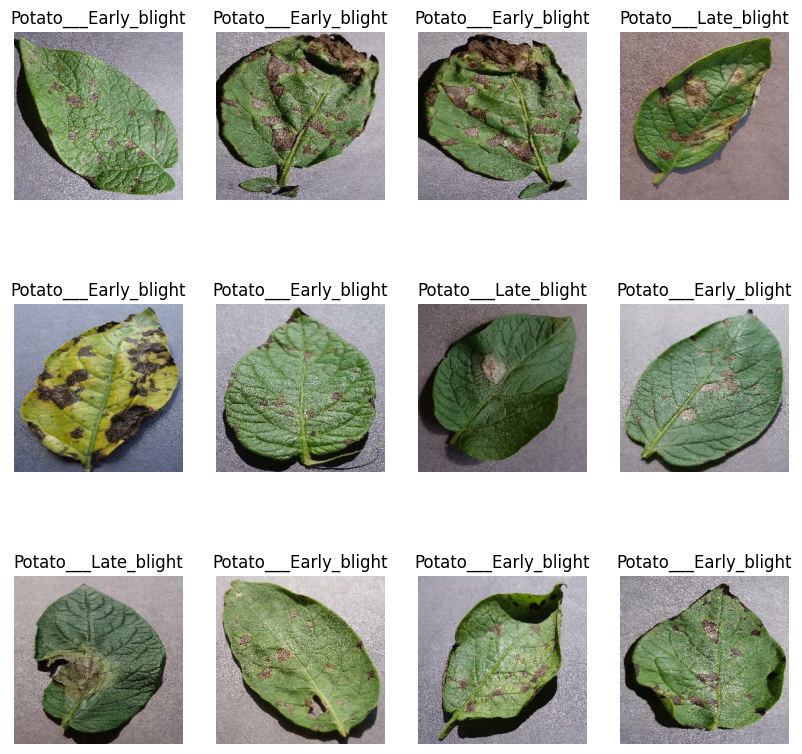

In [7]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [8]:
# # Assuming you have a list of class names
# class_names = ['early blight', 'late blight', 'healthy']

# # Get a batch of images and labels from the generator
# images, labels = next(train_generator)

# fig, axes = plt.subplots(3, 3, figsize=(7, 7))

# for i, ax in enumerate(axes.flat):
#     ax.imshow(images[i])
#     class_index = labels[i].argmax()
#     class_name = class_names[class_index]
#     ax.set_title(f'Class: {class_name}')
#     ax.axis('off')
    
# plt.tight_layout()
# plt.show()

In [9]:
total_sample = len(dataset)

In [10]:
total_sample

68

In [11]:
train_size = int(0.8 * total_sample)
test_size = int(0.2 * total_sample)
val_size = total_sample - train_size - test_size

In [12]:
dataset = dataset.shuffle(buffer_size = total_sample, seed = 42)

In [13]:
train_dataset = dataset.take(train_size)
test_val_dataset = dataset.skip(train_size)
test_dataset = test_val_dataset.take(test_size)
val_dataset = test_val_dataset.skip(test_size)

In [14]:
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [15]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
    
])


In [16]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [17]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)


In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [19]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [20]:
history = model.fit(
    train_dataset,
    batch_size=BATCH_SIZE,
    validation_data=val_dataset,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 [==============================] - 148s 3s/step - loss: 0.8999 - accuracy: 0.5223 - val_loss: 0.8206 - val_accuracy: 0.4688
Epoch 2/50
54/54 [==============================] - 83s 2s/step - loss: 0.7339 - accuracy: 0.6543 - val_loss: 0.5920 - val_accuracy: 0.7500
Epoch 3/50
54/54 [==============================] - 72s 1s/step - loss: 0.4201 - accuracy: 0.8198 - val_loss: 0.2521 - val_accuracy: 0.9062
Epoch 4/50
54/54 [==============================] - 77s 1s/step - loss: 0.2817 - accuracy: 0.8950 - val_loss: 0.0532 - val_accuracy: 1.0000
Epoch 5/50
54/54 [==============================] - 77s 1s/step - loss: 0.1941 - accuracy: 0.9284 - val_loss: 0.0763 - val_accuracy: 1.0000
Epoch 6/50
54/54 [==============================] - 78s 1s/step - loss: 0.1360 - accuracy: 0.9478 - val_loss: 0.0230 - val_accuracy: 1.0000
Epoch 7/50
54/54 [==============================] - 78s 1s/step - loss: 0.1473 - accuracy: 0.9407 - val_loss: 0.0284 - val_accuracy: 1.0000
Epoch 8/50
54/54 [=

In [21]:
scores = model.evaluate(test_dataset)

13/13 [==============================] - 19s 631ms/step - loss: 0.0016 - accuracy: 1.0000


In [22]:
scores

[0.0015847256872802973, 1.0]

In [23]:
history

In [24]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [25]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
type(history.history['loss'])

list

In [27]:
len(history.history['loss'])

50

In [28]:
history.history['loss'][:5]

[0.8999249935150146,
 0.7339432239532471,
 0.4200500249862671,
 0.28165003657341003,
 0.19413678348064423]

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

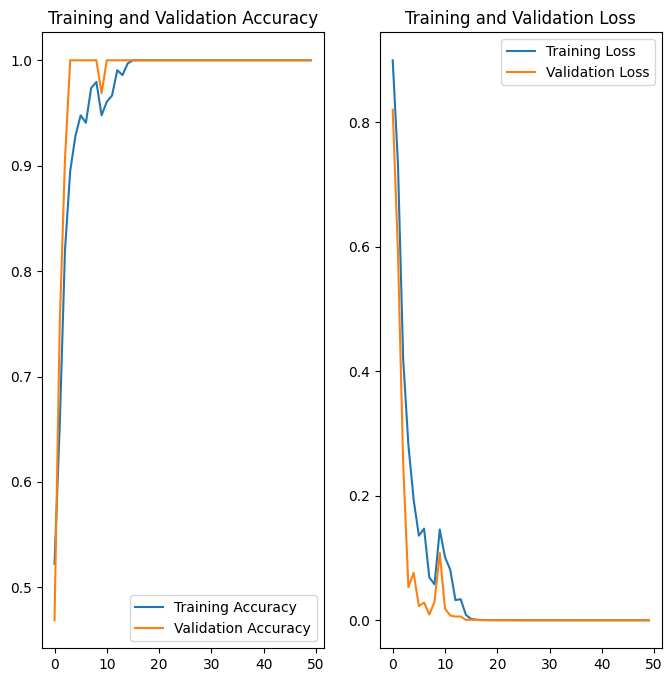

In [30]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___healthy
1/1 [==============================] - 1s 1s/step
predicted label: Potato___healthy


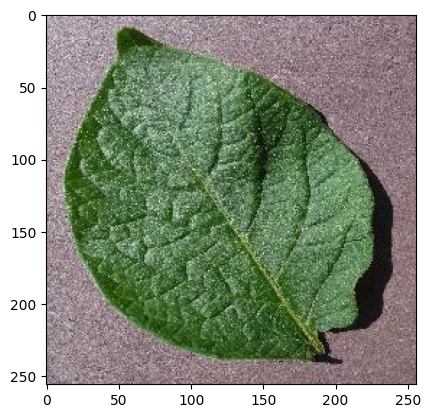

In [32]:
import numpy as np
for images_batch, labels_batch in test_dataset.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [33]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 97ms/step


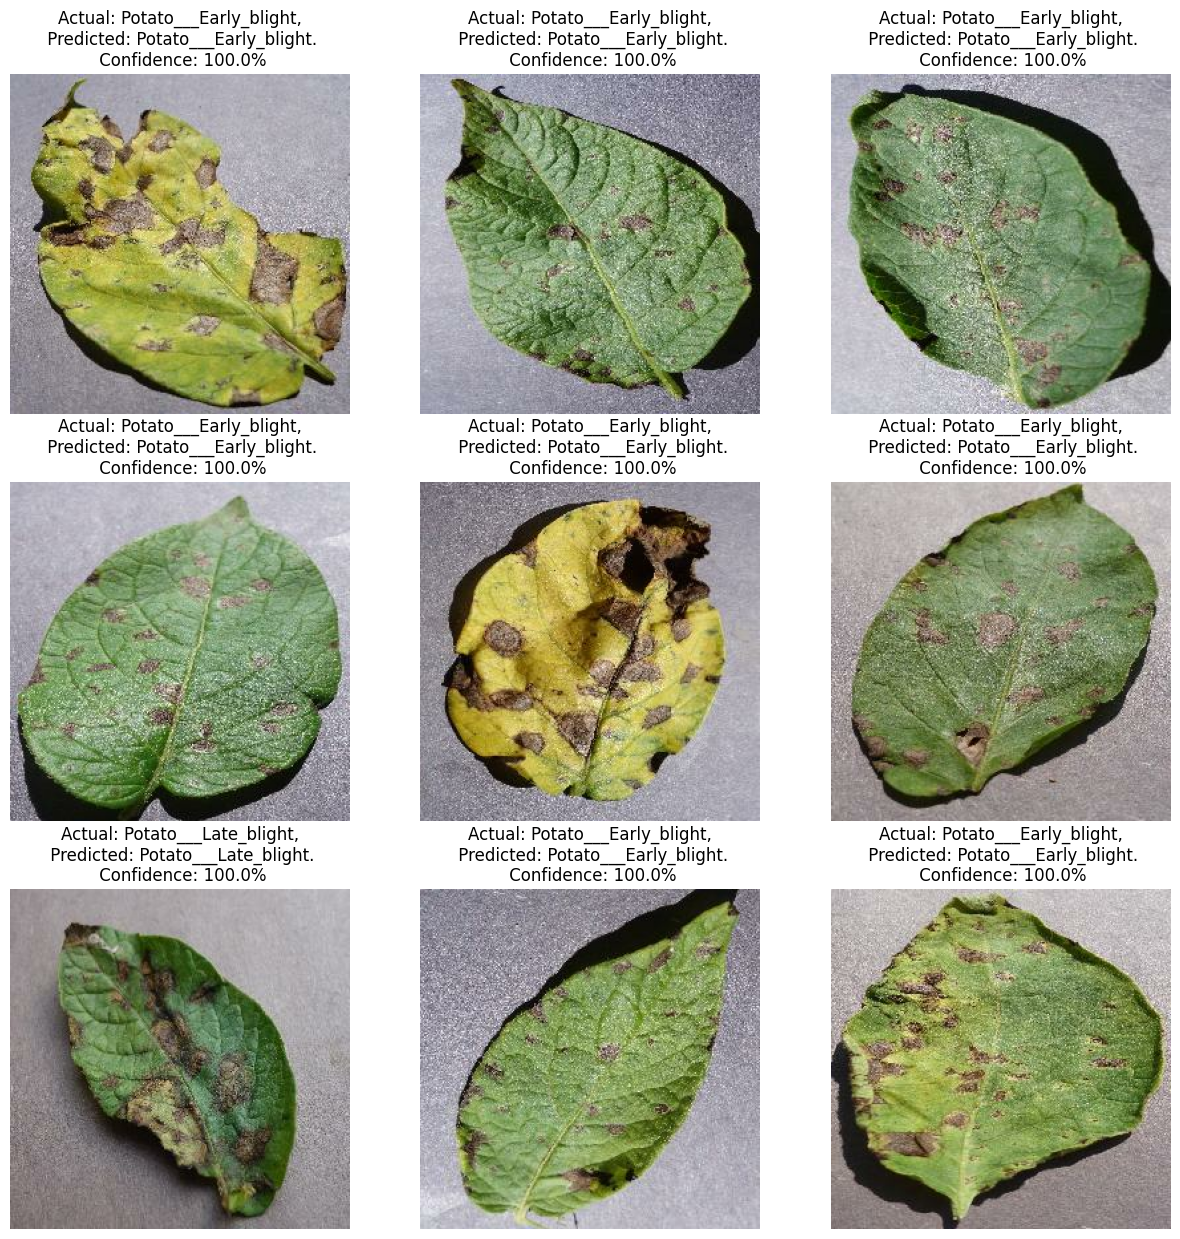

In [35]:
plt.figure(figsize=(15, 15))
for images, labels in test_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [39]:
import os
model_version=max([int(i) for i in os.listdir("models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets


In [40]:
model.save("../potatoes.h5")

C:\Users\shahr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
